## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Importing

In [2]:
df = pd.read_csv('WALMART_SALES_DATA (1).csv')
df2 = df.copy()
df2['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df2['Year']= df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day

## Data Processing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int64  
 8   Week          6435 non-null   int64  
 9   Month         6435 non-null   int64  
 10  Year          6435 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 553.1 KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,26.000000,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,52.000000,12.000000,2012.000000


### - Handlingthe missing values

In [6]:
df.isna().sum().sum()

0

 - No Missing values

In [7]:
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

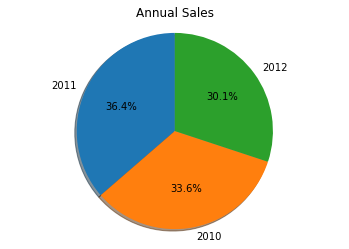

In [8]:
data = [2340, 2160, 1935]
label = ['2011', '2010', '2012']

plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0,0], shadow=True, startangle=90)
plt.title('Annual Sales')
plt.axis('equal')
plt.show()

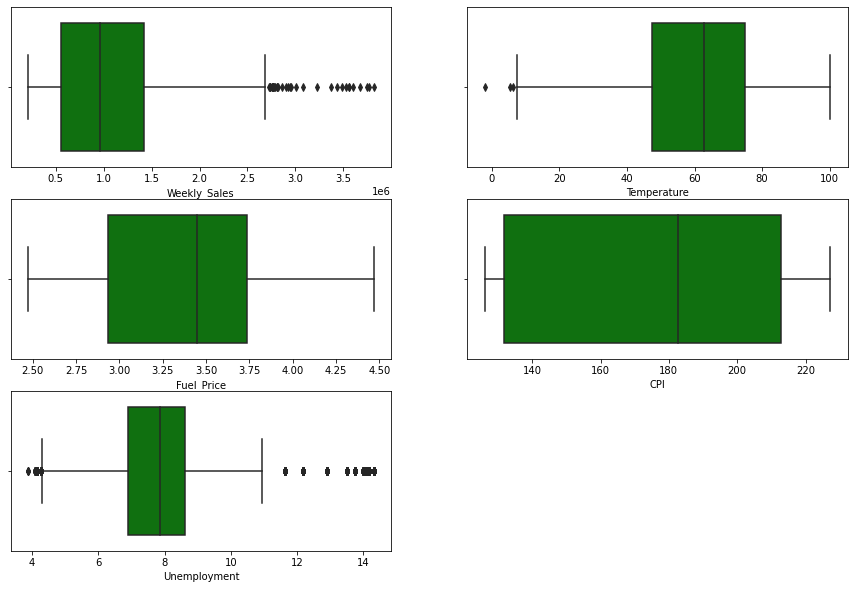

In [9]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i],color = "green")
            plt.xlabel(i)

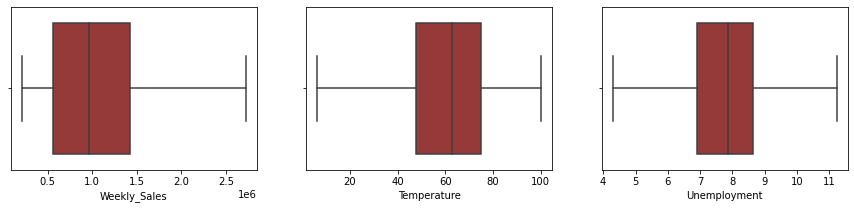

In [10]:
l = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)
n = 1
cols =["Weekly_Sales","Temperature","Unemployment"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i],color='brown')
            plt.xlabel(i)

In [11]:
df['Month'].value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

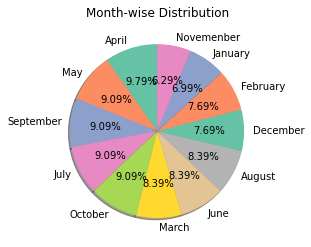

In [12]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
plt.pie(df['Month'].value_counts(), labels =df['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,radius = 1,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()
plt.show()

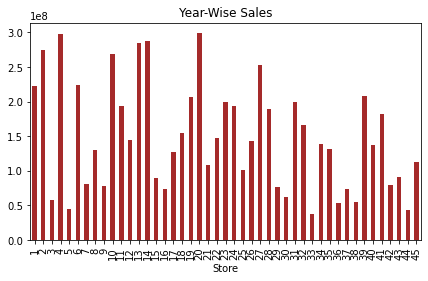

In [13]:
plt.figure(figsize=(7,4))

df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar',color='brown')
plt.title('Year-Wise Sales')

plt.show()

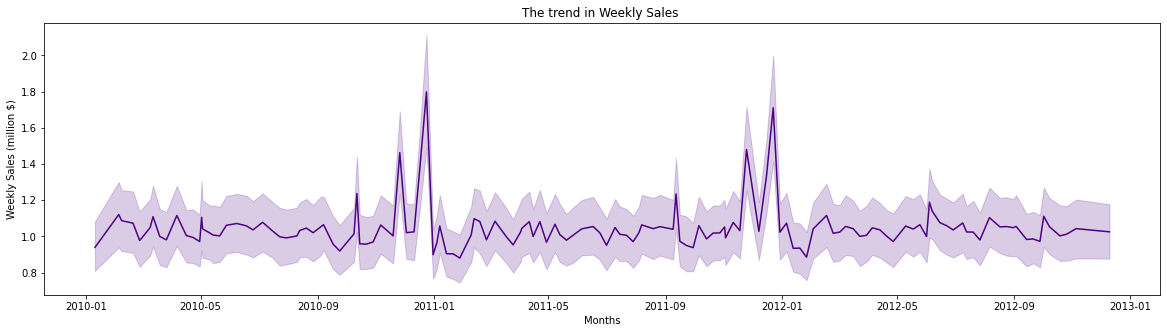

In [14]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df2.Date, y=(df2.Weekly_Sales/1e6),color = 'indigo')

plt.xlabel('Months')
plt.ylabel('Weekly Sales (million $)')
plt.title('The trend in Weekly Sales ')


plt.show()

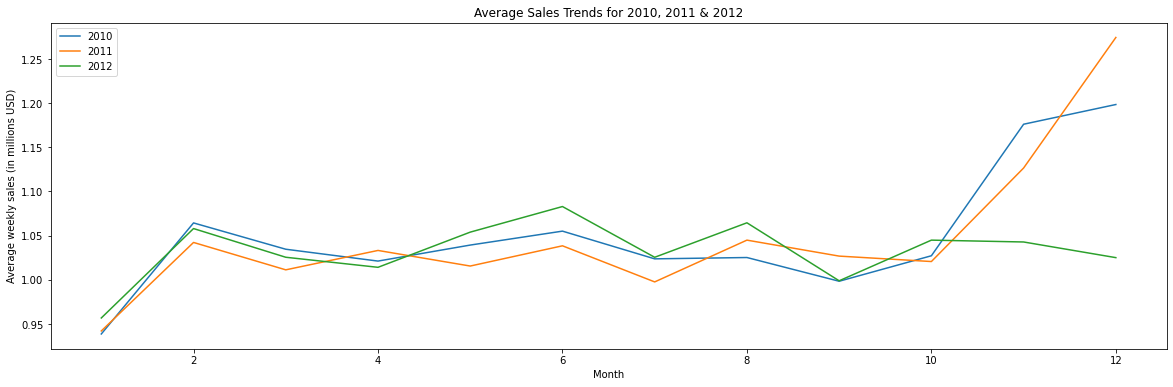

In [15]:
pivot_table = df2.pivot_table(index='Month', columns='Year', values='Weekly_Sales')
pivot_table
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')

plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')

plt.legend()
plt.show()

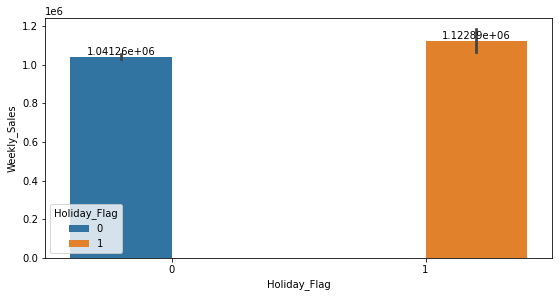

In [16]:
from numpy import mean
t = 1
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales"]:
        if t<=1:
            plt.subplot(3,2,t)
            ax = sns.barplot(data = df2 , x = "Holiday_Flag" ,y = i  , hue = df.Holiday_Flag ,estimator=mean);
            t+=1
            
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

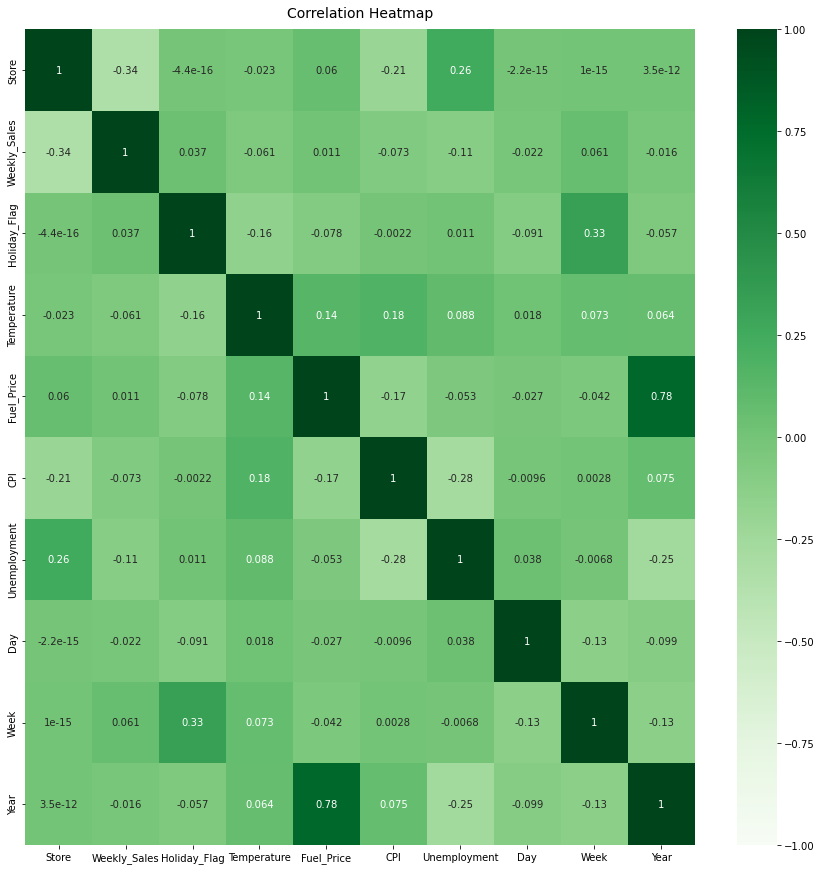

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap ="Greens")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<AxesSubplot:xlabel='Fuel_Price'>

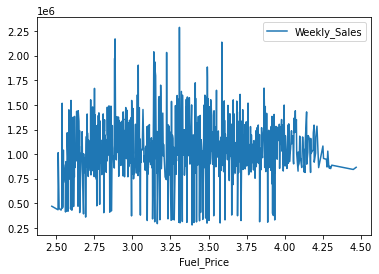

In [18]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

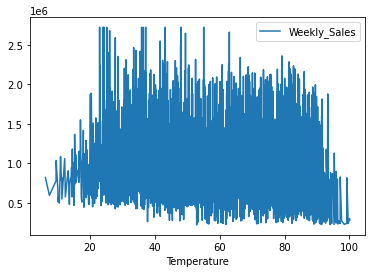

In [19]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='Unemployment'>

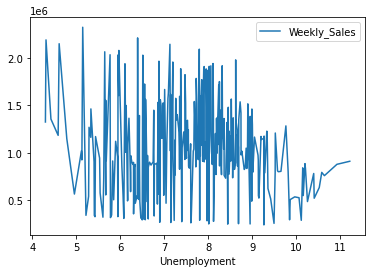

In [20]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

<AxesSubplot:xlabel='CPI'>

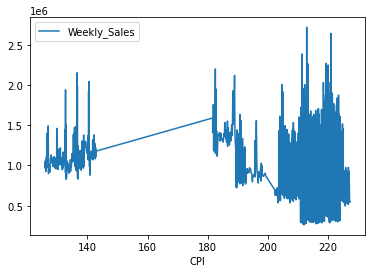

In [21]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()